In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Thu Jan 25 15:08:54 2018

@author: ysc
"""

#导入各种模块
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.integrate import odeint #积分器
from moviepy.video.io.bindings import mplfig_to_npimage#动图生成
import moviepy.editor as mpy

##常用天文常数(国际单位制m,s,kg）$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
m_sun = 1.98855e30 #太阳质量
m_earth = 5.97237e24#地球质量
m_moon = 7.342e22#月球质量

AU = 149597870700#一个天文单位
S_earth_moon = 3.84399e8#月球绕地轨道半长轴
R_earth = 6.371e6 #地球平均半径

G = 6.67191e-11#万有引力常数
##初值设定$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#太阳、地球、火星
m1 = 1 * m_earth #质量
x1, y1, z1 = 0.0,0.0,0.0 #初始坐标
v11, v12, v13 = 1e2,3e4,0.0 #初始速度

m2 = 0.11 * m_earth
x2, y2, z2 = 0.5 * AU,0.0,0.0
v21, v22, v23 = -5e2,2.4e4,0.0

m3 = 1 * m_sun
x3, y3, z3 = -1 * AU,0.0,0.0
v31, v32, v33 = 0,0.0,0.0


M = m1 + m2 + m3#总质量

##积分器$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
##积分器$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
ta = 0 #初始时刻 
tb = 100000000 #终止时刻(s)
step = 1000  #步长(s)
number = int(tb / step)

#积分计算$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
ni = 0#积分器计数
#x_i$
def int_function(vrb, t, m1, m2, m3, G):
    x1, y1, z1, x2, y2, z2, x3, y3, z3, v11, v12, v13, v21, v22, v23, v31, v32, v33, ni = vrb.tolist()
 
    #################你在这里写代码#################################################################
    
    r12 = 0
    r13 = 0
    r23 = 0
    
    a11 = 0
    a12 = 0
    a13 = 0
    
    a21 = 0
    a22 = 0
    a23 = 0

    a31 = 0
    a32 = 0
    a33 = 0

    #################你在这里写代码#################################################################
    
    
    dv11 = a11
    dv12 = a12
    dv13 = a13

    dv21 = a21
    dv22 = a22
    dv23 = a23

    dv31 = a31
    dv32 = a32
    dv33 = a33


    dx1 = v11
    dy1 = v12
    dz1 = v13

    dx2 = v21
    dy2 = v22
    dz2 = v23

    dx3 = v31
    dy3 = v32
    dz3 = v33
    
    dni = 1.0
    
    print(" Processing",round(1000*ni/number,1),'%',end='\r')   #输出进度条
    return dx1, dy1, dz1, dx2, dy2, dz2, dx3, dy3, dz3, dv11, dv12, dv13, dv21, dv22, dv23, dv31, dv32, dv33, dni

#参数值在代码开头设置
init_status = x1, y1, z1, x2, y2, z2, x3, y3, z3, v11, v12, v13, v21, v22, v23, v31, v32, v33, ni
args = m1, m2, m3, G
t = np.arange(ta, tb, step)
result = odeint(int_function, init_status, t, args)


#绘图#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#绘图#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
x1_plot = [0 for x_ in range(number)]#创建列表以存储坐标
y1_plot = [0 for x_ in range(number)]
z1_plot = [0 for x_ in range(number)]
x2_plot = [0 for x_ in range(number)]
y2_plot = [0 for x_ in range(number)]
z2_plot = [0 for x_ in range(number)]
x3_plot = [0 for x_ in range(number)]
y3_plot = [0 for x_ in range(number)]
z3_plot = [0 for x_ in range(number)]
xc_plot = [0 for x_ in range(number)]
yc_plot = [0 for x_ in range(number)]
zc_plot = [0 for x_ in range(number)]


for i in range(0, number):
     
    xc_plot[i] = (m1 * result[i][0] + m2 * result[i][3] + m3 * result[i][6]) / M #质心坐标
    yc_plot[i] = (m1 * result[i][1] + m2 * result[i][4] + m3 * result[i][7]) / M
    zc_plot[i] = (m1 * result[i][2] + m2 * result[i][5] + m3 * result[i][8]) / M 
    
    # #非质心系,若要用则需注释掉下面质心系的部分
    # x1_plot[i] = result[i][0] 
    # y1_plot[i] = result[i][1] 
    # z1_plot[i] = result[i][2] 
    # x2_plot[i] = result[i][3] 
    # y2_plot[i] = result[i][4] 
    # z2_plot[i] = result[i][5] 
    # x3_plot[i] = result[i][6] 
    # y3_plot[i] = result[i][7] 
    # z3_plot[i] = result[i][8] 
    
    #质心系坐标
    x1_plot[i] = result[i][0] - xc_plot[i]
    y1_plot[i] = result[i][1] - yc_plot[i]
    z1_plot[i] = result[i][2] - zc_plot[i]
    x2_plot[i] = result[i][3] - xc_plot[i]
    y2_plot[i] = result[i][4] - yc_plot[i]
    z2_plot[i] = result[i][5] - zc_plot[i]
    x3_plot[i] = result[i][6] - xc_plot[i]
    y3_plot[i] = result[i][7] - yc_plot[i]
    z3_plot[i] = result[i][8] - zc_plot[i]

    # #m1参考系 坐标
    # x1_plot[i] = 0
    # y1_plot[i] = 0
    # z1_plot[i] = 0
    # x2_plot[i] = result[i][3] - result[i][0]
    # y2_plot[i] = result[i][4] - result[i][1]
    # z2_plot[i] = result[i][5] - result[i][2]
    # x3_plot[i] = result[i][6] - result[i][0]
    # y3_plot[i] = result[i][7] - result[i][1]
    # z3_plot[i] = result[i][8] - result[i][2]

    # #m2参考系 坐标
    # x1_plot[i] = result[i][0] - result[i][3]
    # y1_plot[i] = result[i][1] - result[i][4]
    # z1_plot[i] = result[i][2] - result[i][5]
    # x2_plot[i] = 0
    # y2_plot[i] = 0
    # z2_plot[i] = 0
    # x3_plot[i] = result[i][6] - result[i][3]
    # y3_plot[i] = result[i][7] - result[i][4]
    # z3_plot[i] = result[i][8] - result[i][5]
    
print("Calculation finished!")  ##运行提示，计算完成

Calculation finished! %


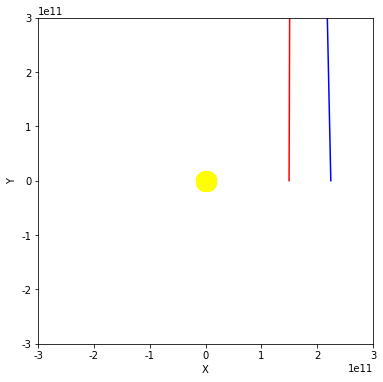

In [2]:
#二维xy绘图    
plt.figure(figsize = (6,6))#figsize代表横纵比
plt.plot(x1_plot, y1_plot,c="red")#c表示绘制颜色,可以为十六进制颜色码，如c = '#6BABF4'
plt.plot(x2_plot, y2_plot,c="blue")
plt.plot(x3_plot, y3_plot,'o', ms=20, c ='yellow')#ms表示绘制点线尺寸，c表示绘制颜色，'o'表示绘点
plt.ylabel('Y')#坐标轴
plt.xlabel('X')
plt.xlim(-3e11,3e11)#设置横坐标
plt.ylim(-3e11,3e11)#设置纵坐标
plt.show()
# plt.savefig('3body2D.png',format = 'png', dpi = 300)#输出图片名称,格式，分辨率
# plt.close()

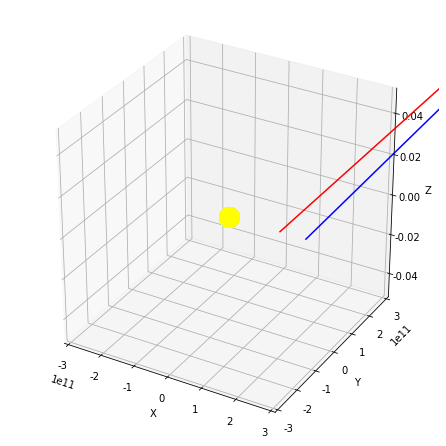

In [3]:
#三维绘图
#创建一个三维的绘图工程
fig = plt.figure(figsize = (6,6))
ax = Axes3D(fig)
ax.plot(x1_plot, y1_plot, z1_plot, c="red")
ax.plot(x2_plot, y2_plot, z2_plot, c="blue")
ax.plot(x3_plot, y3_plot, z3_plot,'o', ms=20, c ='yellow')#ms表示绘制点线尺寸，c表示绘制颜色，'o'表示绘点
ax.set_xlim(-3e11,3e11)#设置横坐标
ax.set_ylim(-3e11,3e11)#设置纵坐标
ax.set_zlabel('Z') #坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')

plt.show()#显示图片
# plt.savefig('3body3D.png',format = 'png', dpi = 300)
# # plt.close()#保存图片

100%|█████████▉| 200/201 [00:31<00:00,  4.33it/s]


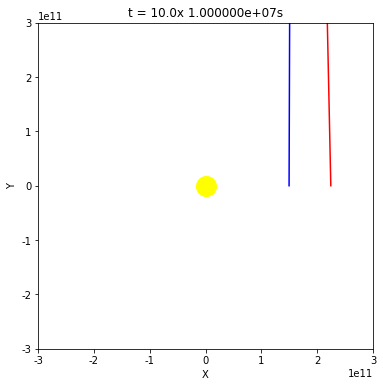

In [4]:
#绘2d动图#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# 使用MATPLOTLIB画一个图
duration = 10 #总共的时间
speed = 1.0#播放速率       
fig_mpl, ax = plt.subplots(1, figsize=(6,6),facecolor='white')#figsize代表横纵比


# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF等.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
    
    
    ax.clear()
    ax.set_xlim(-3e11,3e11)#设置横坐标
    ax.set_ylim(-3e11,3e11)#设置纵坐标
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    ax.plot(x1_plot[index:(index + 1)], y1_plot[index:(index + 1)], 'o', ms=10, c ='blue') #ms表示绘制点线尺寸，c表示绘制颜色，'o'表示绘点
    ax.plot(x2_plot[index:(index + 1)], y2_plot[index:(index + 1)], 'o', ms=5, c ='red')
    ax.plot(x3_plot[index:(index + 1)], y3_plot[index:(index + 1)], 'o', ms=20, c ='yellow')
    ax.plot(x1_plot[0:index], y1_plot[0:index], ms=0.2, c ='blue')
    ax.plot(x2_plot[0:index], y2_plot[0:index], ms=0.2, c ='red')
    ax.plot(x3_plot[0:index], y3_plot[0:index], ms=0.2, c ='yellow')

    ax.set_title("t = " + str(round(t,1)) + "x %e" % (tb/duration) + "s")#设置标题,round为近似函数
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration) #duration表示所制作视频正常速度播放的时间
# animation.speedx(speed).write_videofile("3body2D.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=20, loop=1, autoplay=1) #用于在Jupyter上输出，也可本地输出mp4,speedx表示播放速度(1.0为正常速度), fps每秒帧数,loop表示是否循环播放(1或者0)，autoplay表示是否自动播放(1或者0)


100%|█████████▉| 250/251 [01:09<00:00,  2.44it/s]


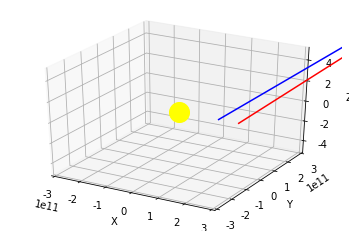

In [5]:
# #绘动图3d2#$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
duration = 10 #总共的时间       figsize代表横纵比
speed = 1.0#播放速率    

fig_mpl = plt.figure()
ax = fig_mpl.add_subplot(111, projection='3d')


# 使用MOVIEPY让图动起来(根据时间t来更新图). 保存为GIF.
def make_frame_mpl(t):
    tNorm = t/duration      #0 --> 1
    index = int(number*(t/duration))  #0 --> number
    
    ax.clear()
    ax.set_zlabel('Z') #坐标轴
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    ax.set_xlim(-3e11,3e11)#设置刻度
    ax.set_ylim(-3e11,3e11)
    ax.set_zlim(-5,5)


    ax.plot(x1_plot[index:(index + 1)], y1_plot[index:(index + 1)],z1_plot[index:(index + 1)],'o',ms=10, c ='blue')
    ax.plot(x2_plot[index:(index + 1)], y2_plot[index:(index + 1)],z2_plot[index:(index + 1)],'o',ms=5, c ='red')
    ax.plot(x3_plot[index:(index + 1)], y3_plot[index:(index + 1)],z3_plot[index:(index + 1)],'o',ms=20, c ='yellow')
    ax.plot(x1_plot[0:index], y1_plot[0:index],z1_plot[0:index], ms=0.2, c ='blue')
    ax.plot(x2_plot[0:index], y2_plot[0:index],z2_plot[0:index], ms=0.2, c ='red')
    ax.plot(x3_plot[0:index], y3_plot[0:index],z3_plot[0:index], ms=0.2, c ='yellow')
    return mplfig_to_npimage(fig_mpl) # RGB image of the figure

animation =mpy.VideoClip(make_frame_mpl, duration=duration)
# animation.speedx(speed).write_videofile("3body3D.mp4", fps=30) #输出mp4, speedx表示播放速度(1.0为正常速度), fps每秒帧数
animation.speedx(speed).ipython_display(fps=25, loop=1, autoplay=0)